In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix
%matplotlib inline

In [3]:
titanic = pd.read_csv('titanic_train.csv')

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


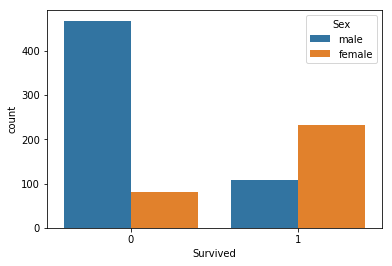

In [5]:
sns.countplot(x = 'Survived' , hue = 'Sex' , data = titanic)

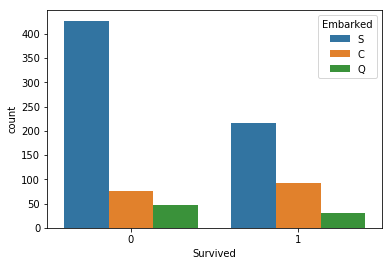

In [6]:
sns.countplot(x = 'Survived' , hue = 'Embarked' , data = titanic)

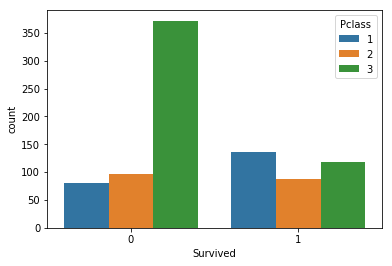

In [7]:
sns.countplot(x = 'Survived' , hue = 'Pclass' , data = titanic)

In [8]:
tc = titanic.isnull()

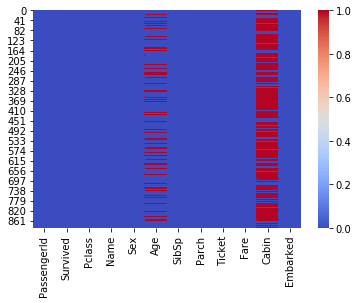

In [9]:
sns.heatmap(tc , cmap = 'coolwarm' )

In [10]:
titanic.drop('Cabin' , inplace = True , axis = 1)

In [11]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


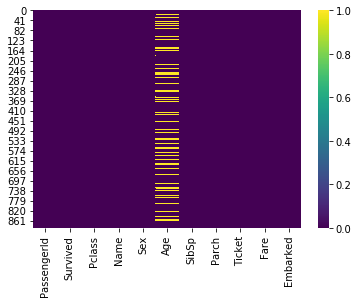

In [12]:
sns.heatmap(titanic.isnull() , cmap = 'viridis')

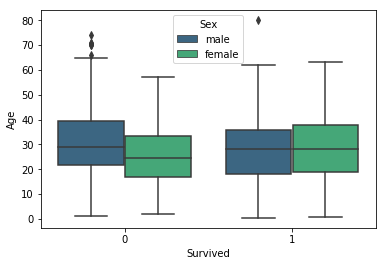

In [13]:
sns.boxplot(x = 'Survived' , y = 'Age' , data = titanic , hue = 'Sex' , palette = 'viridis')

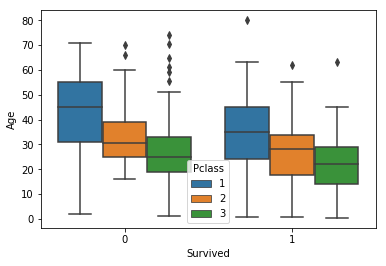

In [14]:
sns.boxplot(x = 'Survived' , y = 'Age' , hue = 'Pclass', data = titanic)

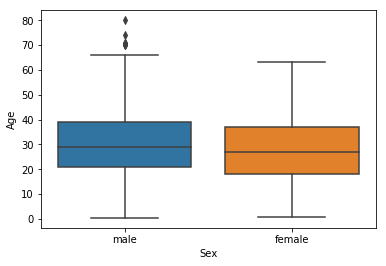

In [15]:
sns.boxplot(x = 'Sex' , y = 'Age' , data = titanic)

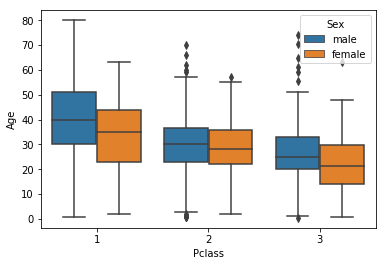

In [16]:
sns.boxplot(x = 'Pclass' , y = 'Age' , hue = 'Sex' ,data = titanic)

In [17]:
def fillAge(cols):
    age = cols[0]
    pclass = cols[1]
    sex = cols[2]
    
    if np.isnan(age):
        if pclass == 1:
            if sex == 'male':
                age = 40
            else:
                age = 37
        elif pclass == 2:
            if sex == 'male':
                age = 30
            else:
                age = 28
        else:
            if sex == 'male':
                age = 25
            else:
                age = 20
    return age

In [18]:
tit = titanic

In [19]:
titanic['Age'] = titanic[['Age' , 'Pclass' , 'Sex']].apply(fillAge , axis = 1)

In [20]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [21]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [22]:
titanic.dropna(inplace = True)

In [23]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


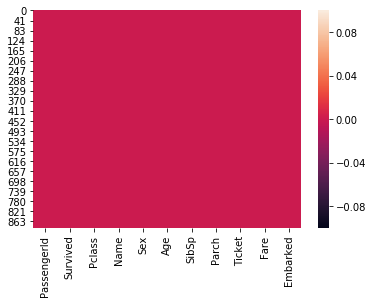

In [24]:
sns.heatmap(titanic.isnull())

In [25]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [26]:
ef = pd.get_dummies(titanic['Sex'] , drop_first = True)
ef.head()

,male
0,1
1,0
2,0
3,0
4,1


In [27]:
em = pd.get_dummies(titanic['Embarked'] , drop_first = True)
em.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [28]:
#titanic.drop(['Q' , 'S' , 'male'] , axis = 1 , inplace = True)
titanic = pd.concat([titanic , em ,ef] , axis = 1)

In [29]:
titanic.dropna(inplace = True)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Q,S,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,1


In [30]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Q', 'S', 'male'],
      dtype='object')

In [32]:
X = titanic[['Age' , 'Parch' , 'Pclass' , 'SibSp' , 'Q' , 'S' , 'male']]
y = titanic['Survived']

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaled_features = scaler.transform(X)
X = pd.DataFrame(scaled_features)
X.head()

,0,1,2,3,4,5,6
0,-0.526736,-0.474326,0.825209,0.431350,-0.307941,0.616794,0.735342
1,0.674690,-0.474326,-1.572211,0.431350,-0.307941,-1.621287,-1.359911
2,-0.226380,-0.474326,0.825209,-0.475199,-0.307941,0.616794,-1.359911
3,0.449422,-0.474326,-1.572211,0.431350,-0.307941,0.616794,-1.359911
4,0.449422,-0.474326,0.825209,-0.475199,-0.307941,0.616794,0.735342


In [35]:
X.head()

,0,1,2,3,4,5,6
0,-0.526736,-0.474326,0.825209,0.431350,-0.307941,0.616794,0.735342
1,0.674690,-0.474326,-1.572211,0.431350,-0.307941,-1.621287,-1.359911
2,-0.226380,-0.474326,0.825209,-0.475199,-0.307941,0.616794,-1.359911
3,0.449422,-0.474326,-1.572211,0.431350,-0.307941,0.616794,-1.359911
4,0.449422,-0.474326,0.825209,-0.475199,-0.307941,0.616794,0.735342


In [36]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0, random_state=101)

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)

pred = knn.predict(X_test)

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

In [50]:
error_rate = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    
    error_rate.append(np.mean(pred != y_test))

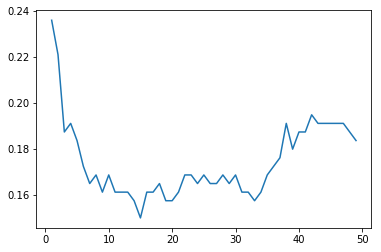

In [51]:
plt.plot(range(1,50) , error_rate)

In [52]:
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train,y_train)

pred = knn.predict(X_test)

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[149  14]
 [ 30  74]]
             precision    recall  f1-score   support

          0       0.83      0.91      0.87       163
          1       0.84      0.71      0.77       104

avg / total       0.84      0.84      0.83       267



In [55]:
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train,y_train)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

In [66]:
logmodel = LogisticRegression()
logmodel.fit(X_train , y_train)
#predictions = logmodel.predict(X_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [36]:
print(classification_report(y_test , predictions))

NameError: name 'predictions' is not defined

In [46]:
print(confusion_matrix(y_test , predictions))

[[149  14]
 [ 36  68]]


In [47]:
#80.89%

In [57]:
test = pd.read_csv('titanic_test.csv')

In [58]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


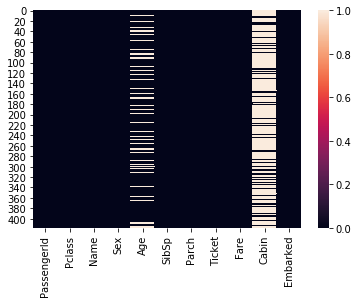

In [59]:
sns.heatmap(test.isnull())

In [60]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [61]:
test.drop('Cabin' , inplace=True , axis = 1)

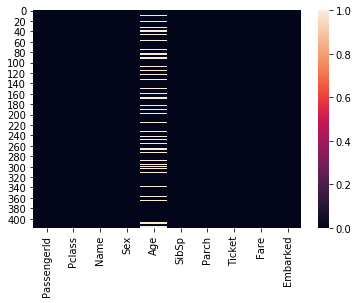

In [62]:
sns.heatmap(test.isnull())

In [63]:
test['Age'] = test[['Age' , 'Pclass' , 'Sex']].apply(fillAge , axis = 1)

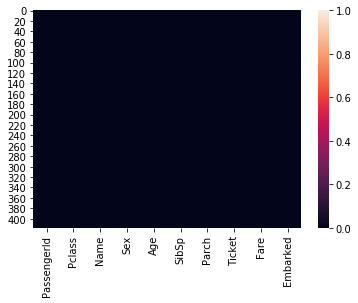

In [64]:
sns.heatmap(test.isnull())

In [65]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 32.7+ KB


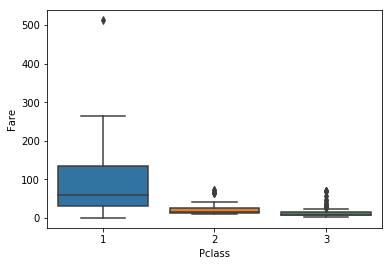

In [66]:
sns.boxplot(x = 'Pclass' , y = 'Fare' , data = test)

In [67]:
test[test['Fare'].isnull() == True]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


In [68]:
np.mean(test[test['Pclass'] == 3]['Fare'])

12.459677880184334

In [69]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 32.7+ KB


In [70]:
test.fillna(12.459677880184334 , inplace = True)

In [71]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 32.7+ KB


In [72]:
ef = pd.get_dummies(test['Sex'] , drop_first = True)
ef.head()
ef.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 1 columns):
male    418 non-null uint8
dtypes: uint8(1)
memory usage: 498.0 bytes


In [73]:
em = pd.get_dummies(test['Embarked'] , drop_first = True)
em.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
Q    418 non-null uint8
S    418 non-null uint8
dtypes: uint8(2)
memory usage: 916.0 bytes


In [74]:
test = pd.concat([test, ef ,em] , axis = 1)

In [75]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,0,1


In [76]:
titu = test[['Age' , 'Parch' , 'Pclass' , 'SibSp' , 'Q' , 'S' , 'male']]
titu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Age       418 non-null float64
Parch     418 non-null int64
Pclass    418 non-null int64
SibSp     418 non-null int64
Q         418 non-null uint8
S         418 non-null uint8
male      418 non-null uint8
dtypes: float64(1), int64(3), uint8(3)
memory usage: 14.4 KB


In [77]:
scaler = StandardScaler()
scaler.fit(titu)
scaled_features = scaler.transform(titu)
titu = pd.DataFrame(scaled_features)
titu.head()

,0,1,2,3,4,5,6
0,0.400932,-0.400248,0.873482,-0.499470,2.843757,-1.350676,0.755929
1,1.362544,-0.400248,0.873482,0.616992,-0.351647,0.740370,-1.322876
2,2.516478,-0.400248,-0.315819,-0.499470,2.843757,-1.350676,0.755929
3,-0.176035,-0.400248,0.873482,-0.499470,-0.351647,0.740370,0.755929
4,-0.560679,0.619896,0.873482,0.616992,-0.351647,0.740370,-1.322876


In [78]:
predictions = knn.predict(titu)

In [79]:
predictions

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [80]:
test['Survived'] = predictions

In [81]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,0,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,0,1,0


In [82]:
t = test[['PassengerId','Survived']]

In [83]:
t.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [84]:
t.to_csv('Solution3.csv')